In [4]:
import collections
from subject_opinion_mining import *
from eda import *
from model_evaluation import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Image
from IPython.core.display import HTML 
import time
from ipywidgets import FloatProgress
from IPython.display import display
from bs4 import BeautifulSoup
import requests
import re
from os import path
from PIL import Image
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)
import math
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.learning_curve import validation_curve
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

In [5]:
master_df = pd.read_csv('Archive_CSV/final_df_forreg.csv',index_col=0)

# EDA

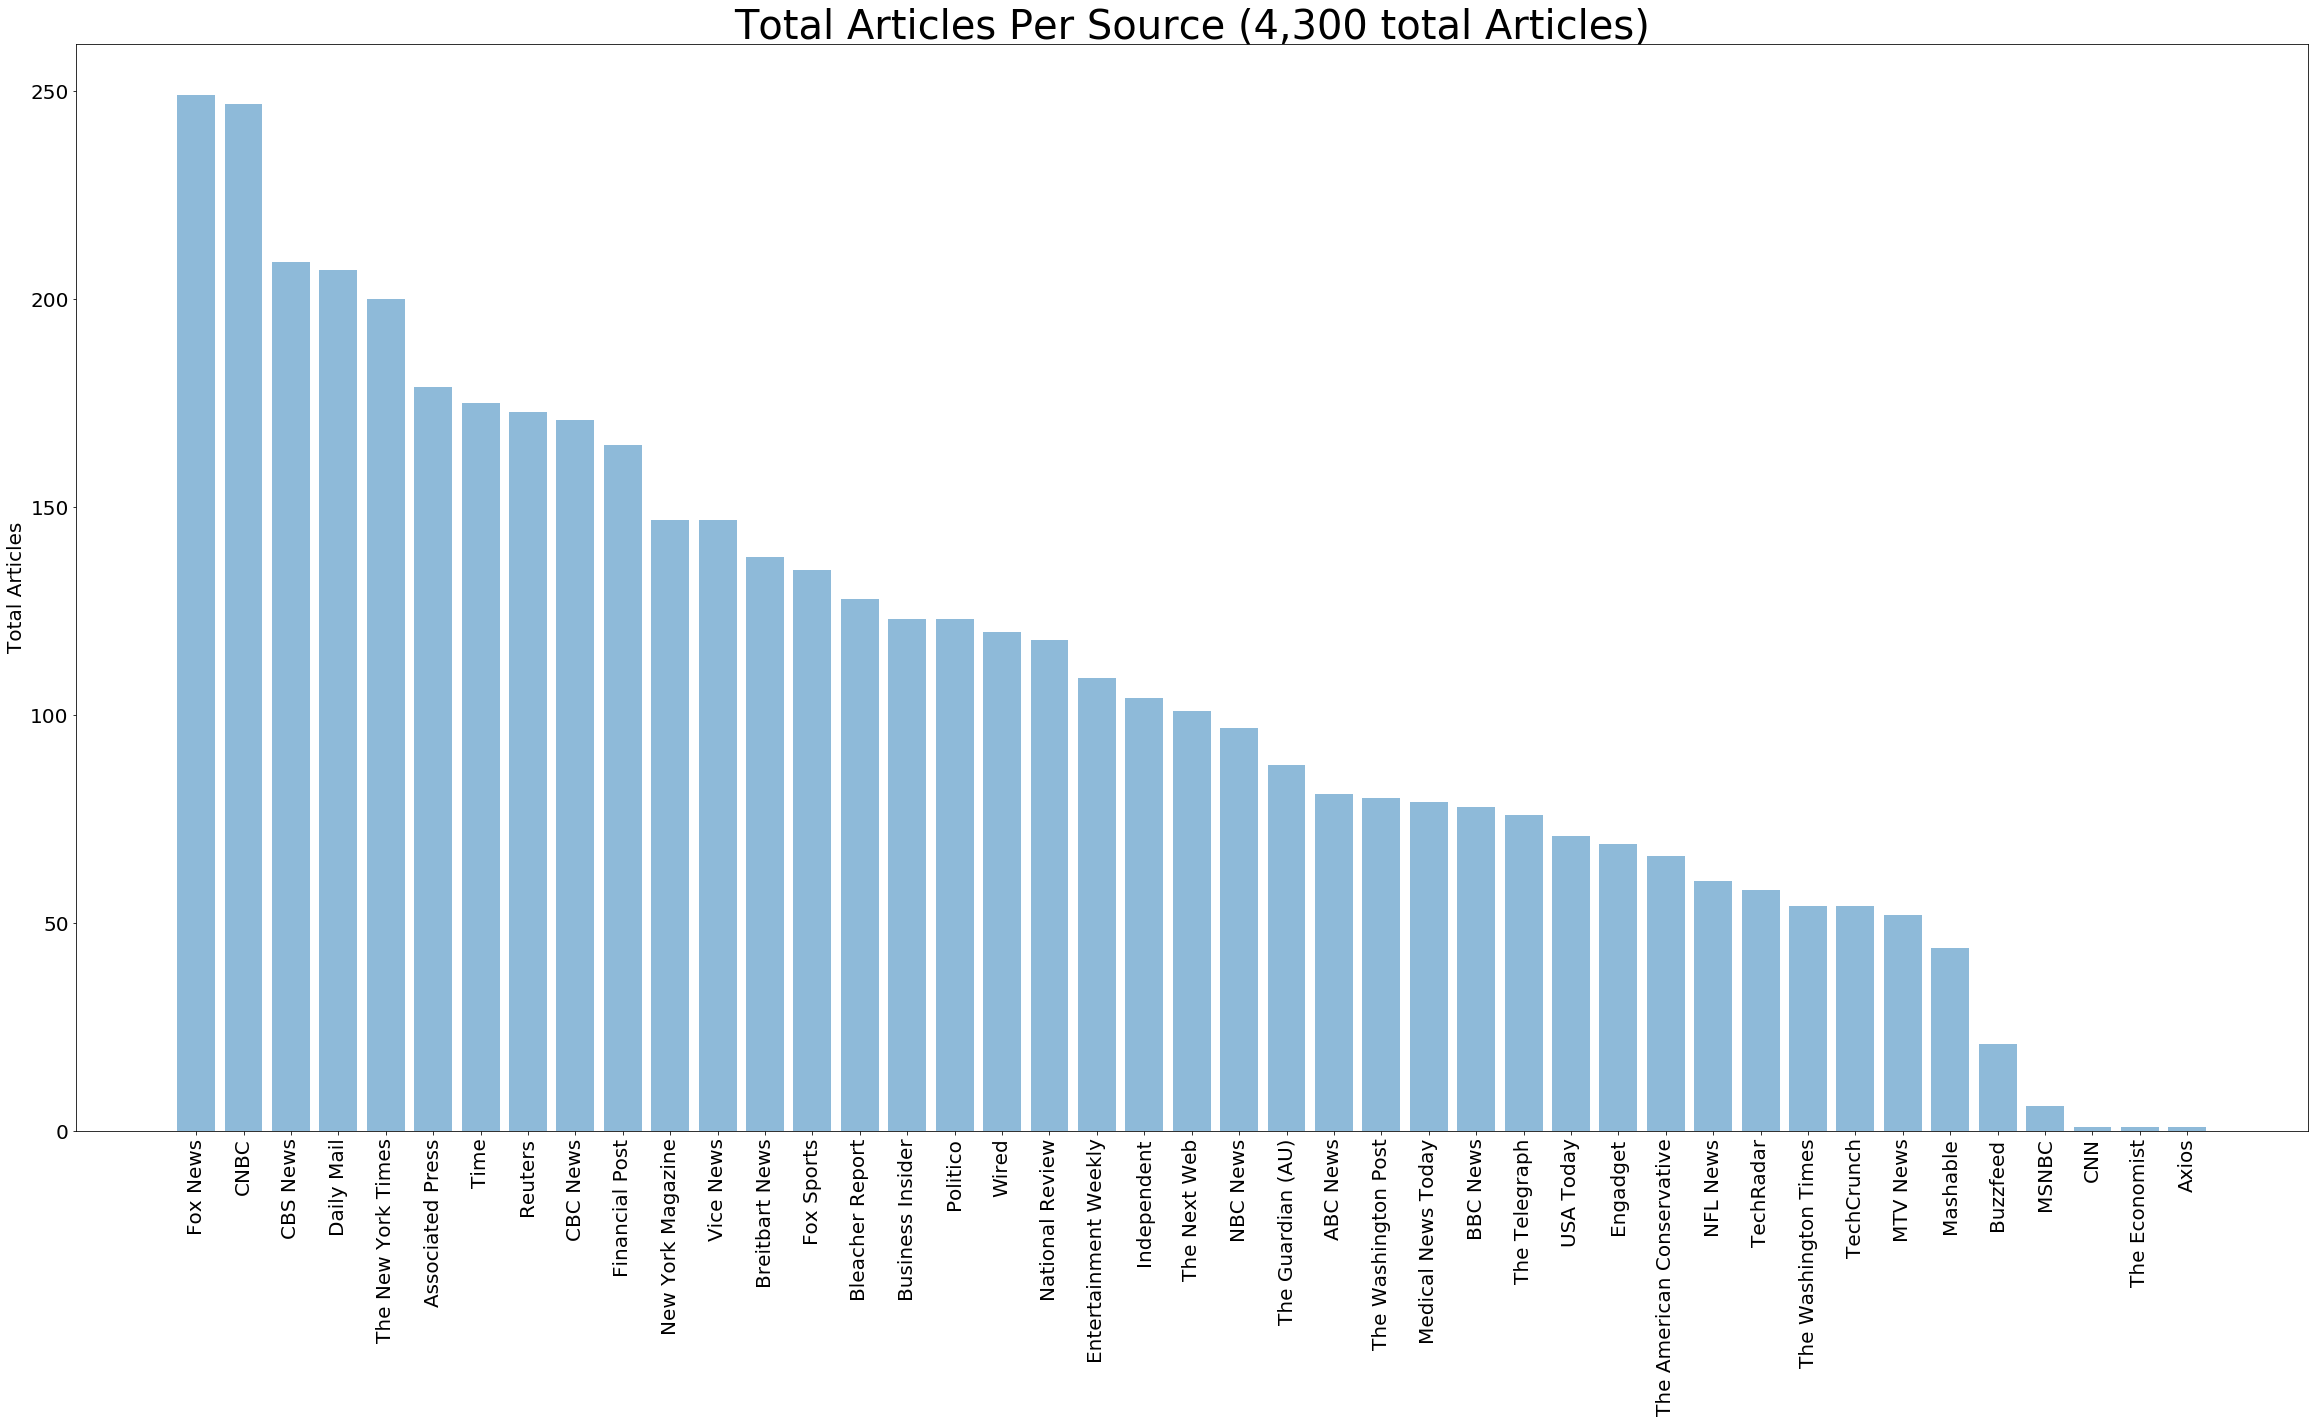

In [6]:
value_counts = pd.DataFrame(master_df.source_name.value_counts())

fig, ax = plt.subplots()
fig.set_size_inches(40, 20)   
plt.xticks(fontsize=20, rotation=90)
plt.bar(list(value_counts.index), list(value_counts.source_name), align='center', alpha=0.5)
plt.ylabel('Total Articles', fontsize=20)
plt.yticks(fontsize=20)
ax.set_title("Total Articles Per Source (4,300 total Articles)", fontsize=40)
 
plt.show()

In [7]:
def plot_hist(parameter, source_name=None):
    data = master_df[parameter]
    if source_name != None:
        new_df = master_df[(master_df.source_name == source_name)]
        data = new_df[parameter]
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 20)   
    n, bins, patches = plt.hist(data,facecolor='g', alpha=0.75)
    plt.xlabel(parameter.capitalize(),fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    ax.set_title('Histogram of ' + parameter,fontsize=40)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.grid(True)
    plt.show()
    display(master_df[parameter].describe())

In [8]:
stats = master_df.describe()
stats = stats.drop('main_cluster',axis=1)
Metric_widget = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = '', disabled = False)
Source_widget = widgets.Dropdown(options=list(set(master_df.source_name)),value = None,description = 'Source', disabled = False)

interact(plot_hist, parameter = Metric_widget,source_name=Source_widget);

interactive(children=(Dropdown(description='parameter', index=7, options=('neg', 'neu', 'pos', 'compound', 'su…

In [9]:
# data_widget = widgets.ToggleButton(options=[master_df],value = master_df,description = '', disabled = False)
metric_widget1 = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = 'Metric', disabled = False)
limit_widget = widgets.IntSlider(min=1, max=45, step=1, value=45)
title_widget = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = 'Title', disabled = False)

interact(box_plots,metric=metric_widget1, title = title_widget, sources_toshow_int=limit_widget);

interactive(children=(Dropdown(description='Metric', index=7, options=('neg', 'neu', 'pos', 'compound', 'subje…

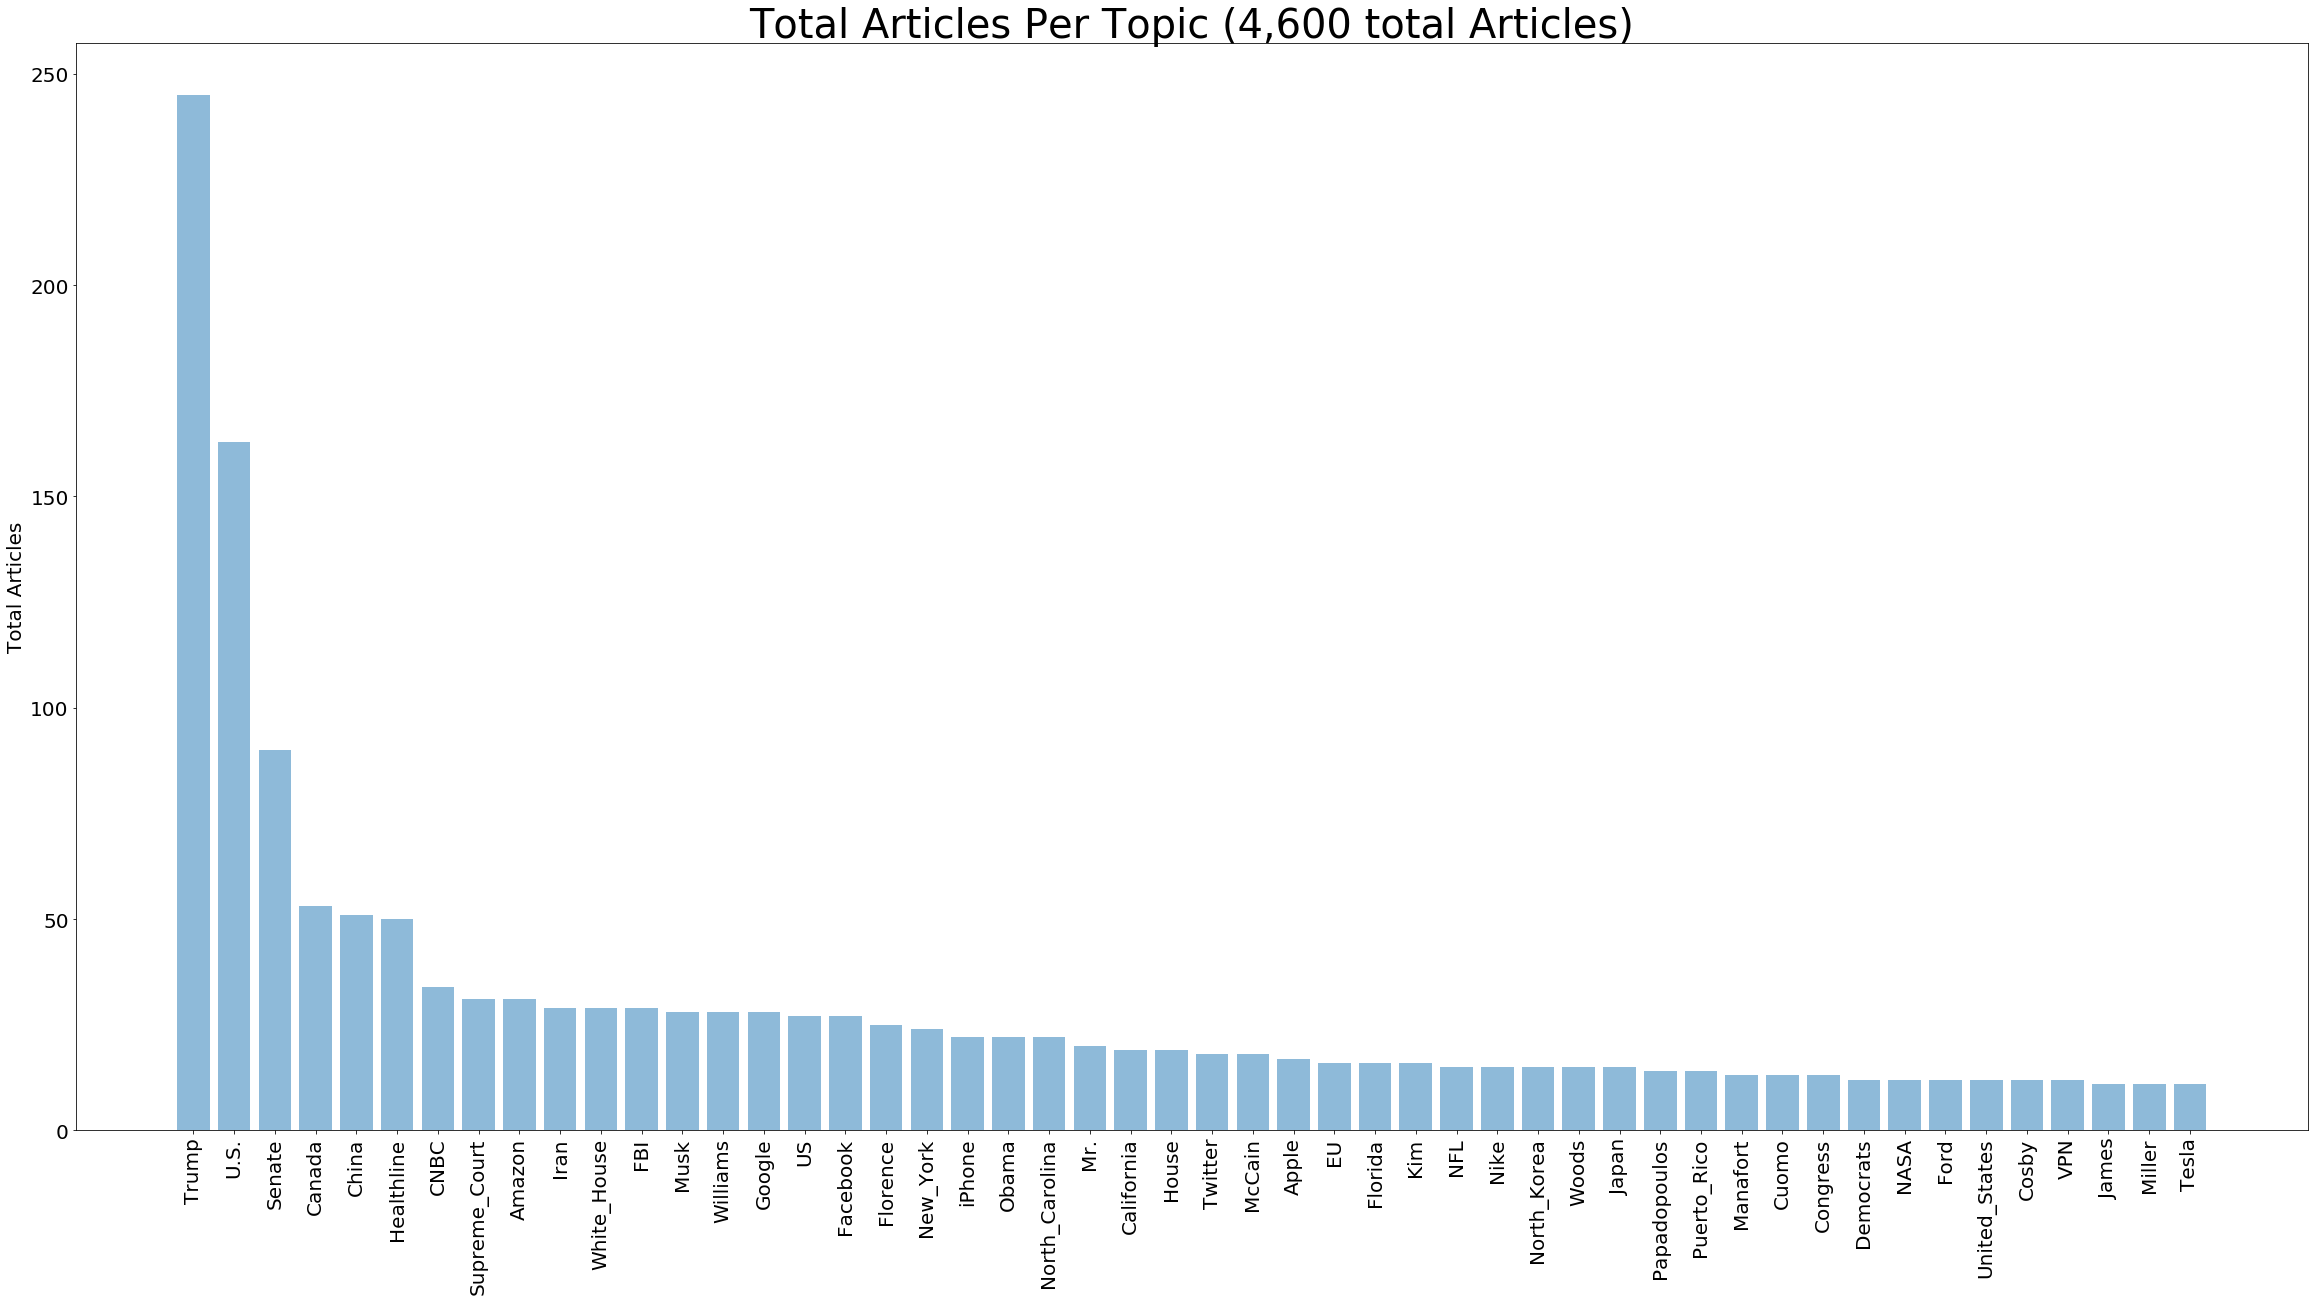

In [10]:
topic_counts = master_df.main_subject.value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(40, 20)   
plt.xticks(fontsize=20, rotation=90)
plt.bar(list(topic_counts.index)[:50], list(topic_counts.values)[:50], align='center', alpha=0.5)
plt.ylabel('Total Articles', fontsize=20)
plt.yticks(fontsize=20)
ax.set_title("Total Articles Per Topic (4,600 total Articles)", fontsize=40)
 
plt.show()

In [11]:
OPINION_LEANING = ['PDT', 'RBR', 'RBS','JJR','JJS'] 
#predeterminer (all the kids)
#comparative adverb (better), superlative adverb (best) 
#comparative and superlative adjectives (bigger, biggest)

In [12]:
nb = pd.read_csv('Classification_models/Opinion/grid_search_Opinion_.csv',index_col=0)
nb

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.070758      0.006169         0.005266        0.001219            1   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 1}           0.941103           0.945698           0.941938   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.942774           0.939014           0.943144           0.949833   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.944398            0.94189           0.946906         0.943669   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.002977                1            0.960345            0.959881   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.960671            0.960624            0.960485   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.960349            0.960953            0.961881   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0             0.95956            0.959328          0.960408          0.00069

In [13]:
metric_widget1 = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = 'Metric', disabled = False)
limit_widget = widgets.IntSlider(min=1, max=45, step=1, value=45)
title_widget = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = 'Title', disabled = False)
subject_widget1 = widgets.Dropdown(options=list(master_df.main_subject.value_counts()[:10].index),value = 'Trump',description = 'Source', disabled = False)
interact(plot_metrics_vs_topics,metric=metric_widget1, title = title_widget, sources_toshow_int=limit_widget, subject = subject_widget1);

interactive(children=(Dropdown(description='Metric', index=7, options=('neg', 'neu', 'pos', 'compound', 'subje…

In [14]:
labels = {'associated-press': 'center',
 'fox-news': 'right',
 'breitbart-news': 'right',
 'the-new-york-times': 'center',
 'vice-news': 'left',
 'the-washington-times': 'center',
 'the-economist': 'center',
 'the-american-conservative': 'right',
 'msnbc': 'left',
 'cnn': 'left',
 'time': 'left',
 'reuters': 'center',
 'national-review': 'right',
 'daily-mail': 'right',}

def plot_metrics_vs_topics_side(metric, title, subject):
    plot_data = []
    perspective = []
    new_df = master_df[master_df.source_id.isin(list(labels.keys()))]
    for index, row in new_df.iterrows():
        label = labels[row.source_id]
        perspective.append(label)
    new_df['label'] = perspective
    for perspective in ['right', 'left', 'center']:
        plot_data.append(new_df[metric][(new_df.label == perspective) & ((new_df.main_subject == subject)|(new_df.sub_topic == subject))])
#     fig, ax = plt.subplots()
#     fig.set_size_inches(40, 20)
#     ax.set_title("Distribution of Outlet's article "+title + ' for Topic of '+subject, fontsize=40)
#     ax.boxplot(plot_data)
#     ax.set_xticklabels(['right', 'left', 'center'])
#     plt.xticks(fontsize=20, rotation=90)
#     plt.yticks(fontsize=20)
#     plt.show()
    trace0 = go.Box(y=plot_data[0],name = 'Right',marker = dict(color = 'red'))
    trace1 = go.Box(y=plot_data[1],name = 'Left',marker = dict(color = 'blue'))
    trace2 = go.Box(y=plot_data[2],name = 'Center',marker = dict(color = 'green'))
    data = [trace0, trace1, trace2]
    layout = go.Layout(title = "% Opinion in Articles About Donald Trump by Political Leaning")
    fig = go.Figure(data=data,layout=layout)
    return py.iplot(fig, filename = "plot from API (20)")
# plot_metrics_vs_topics_side('percent_opinion','Side','Trump')
metric_widget_side = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = 'Metric', disabled = False)
title_widget_side = widgets.Dropdown(options=list(stats.columns),value = 'percent_opinion',description = 'Title', disabled = False)
subject_widget_side = widgets.Dropdown(options=list(master_df.main_subject.value_counts()[:10].index),value = 'Trump',description = 'Source', disabled = False)
interact(plot_metrics_vs_topics_side,metric=metric_widget_side, title = title_widget_side, subject = subject_widget_side);


interactive(children=(Dropdown(description='Metric', index=7, options=('neg', 'neu', 'pos', 'compound', 'subje…

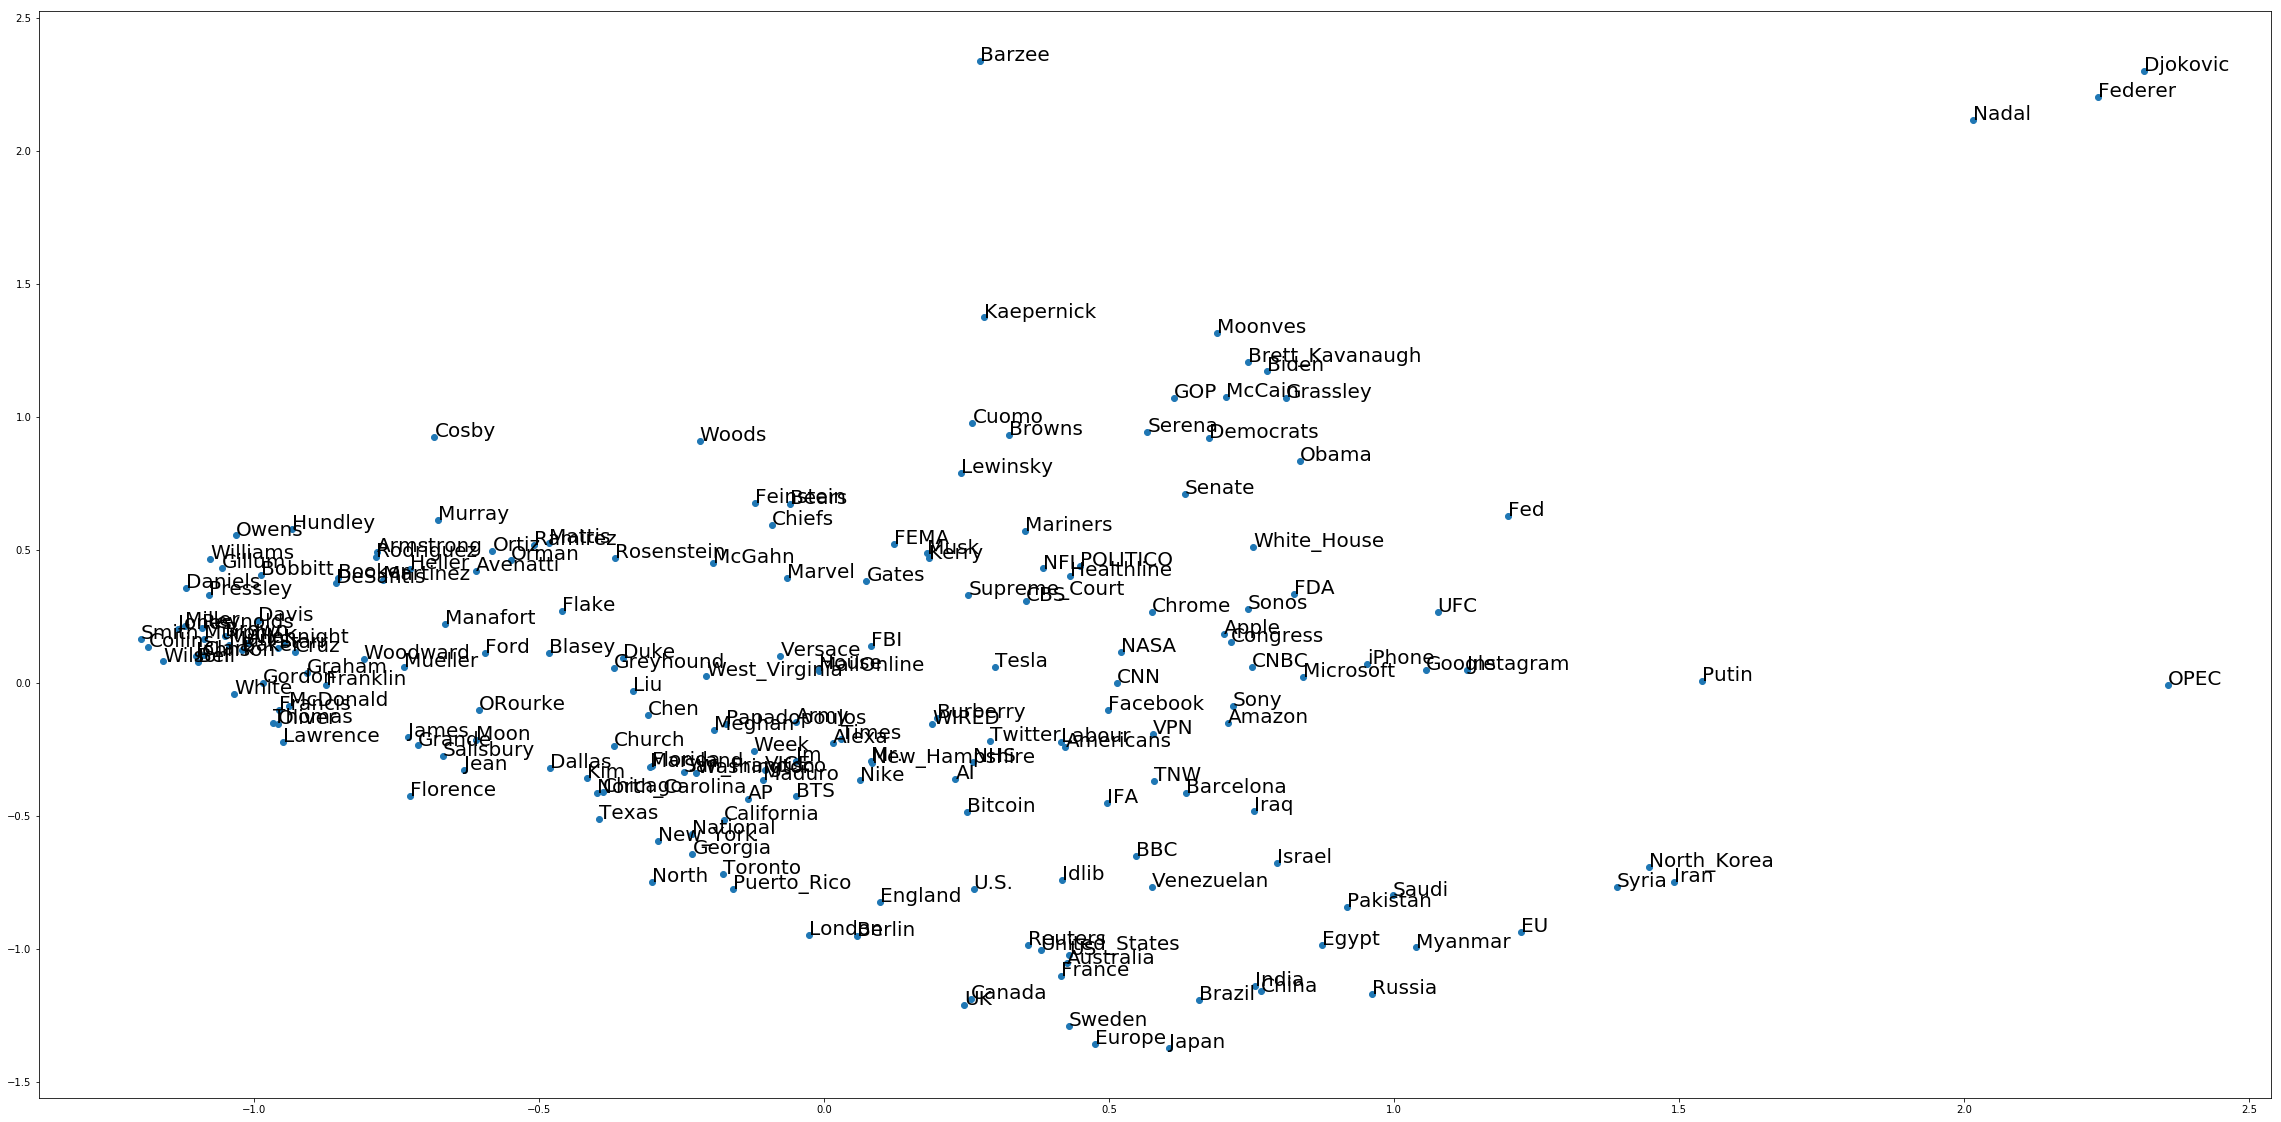

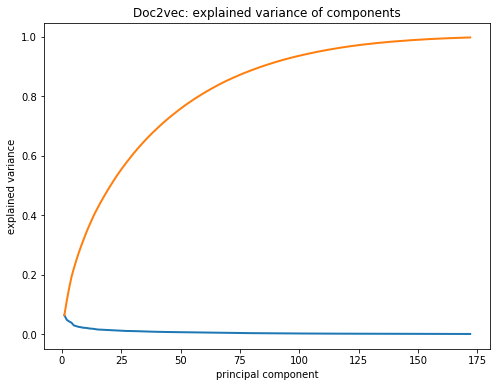

In [15]:
vectorized_topics = pd.read_csv('Archive_CSV/vectorized_topics.csv',index_col=0)
subjects = master_df.main_subject.value_counts()[1:200]
adjust_vecs = vectorized_topics[(vectorized_topics.index.isin(list(subjects.index)))]
adjust_vecs = adjust_vecs.drop('cluster',axis=1)

X = adjust_vecs
pca = PCA(n_components=172)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig, ax = plt.subplots()
fig.set_size_inches(40, 20)
ax.scatter(result[:, 0], result[:, 1])
words = list(adjust_vecs.index)
for i, word in enumerate(words):
    text = ax.annotate(word, xy=(result[i, 0], result[i, 1]))
    text.set_fontsize(20)
x_values = range(1, pca.n_components_+1)
ratio = pca.explained_variance_ratio_
def plot_explained_variance(total_features,exp_variance_ratio):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(total_features, exp_variance_ratio, lw=2, label='explained variance')
    ax.plot(total_features, np.cumsum(exp_variance_ratio), lw=2, label='cumulative explained variance')
    ax.set_title('Doc2vec: explained variance of components')
    ax.set_xlabel('principal component')
    ax.set_ylabel('explained variance')
    plt.show()
plot_explained_variance(x_values,ratio)

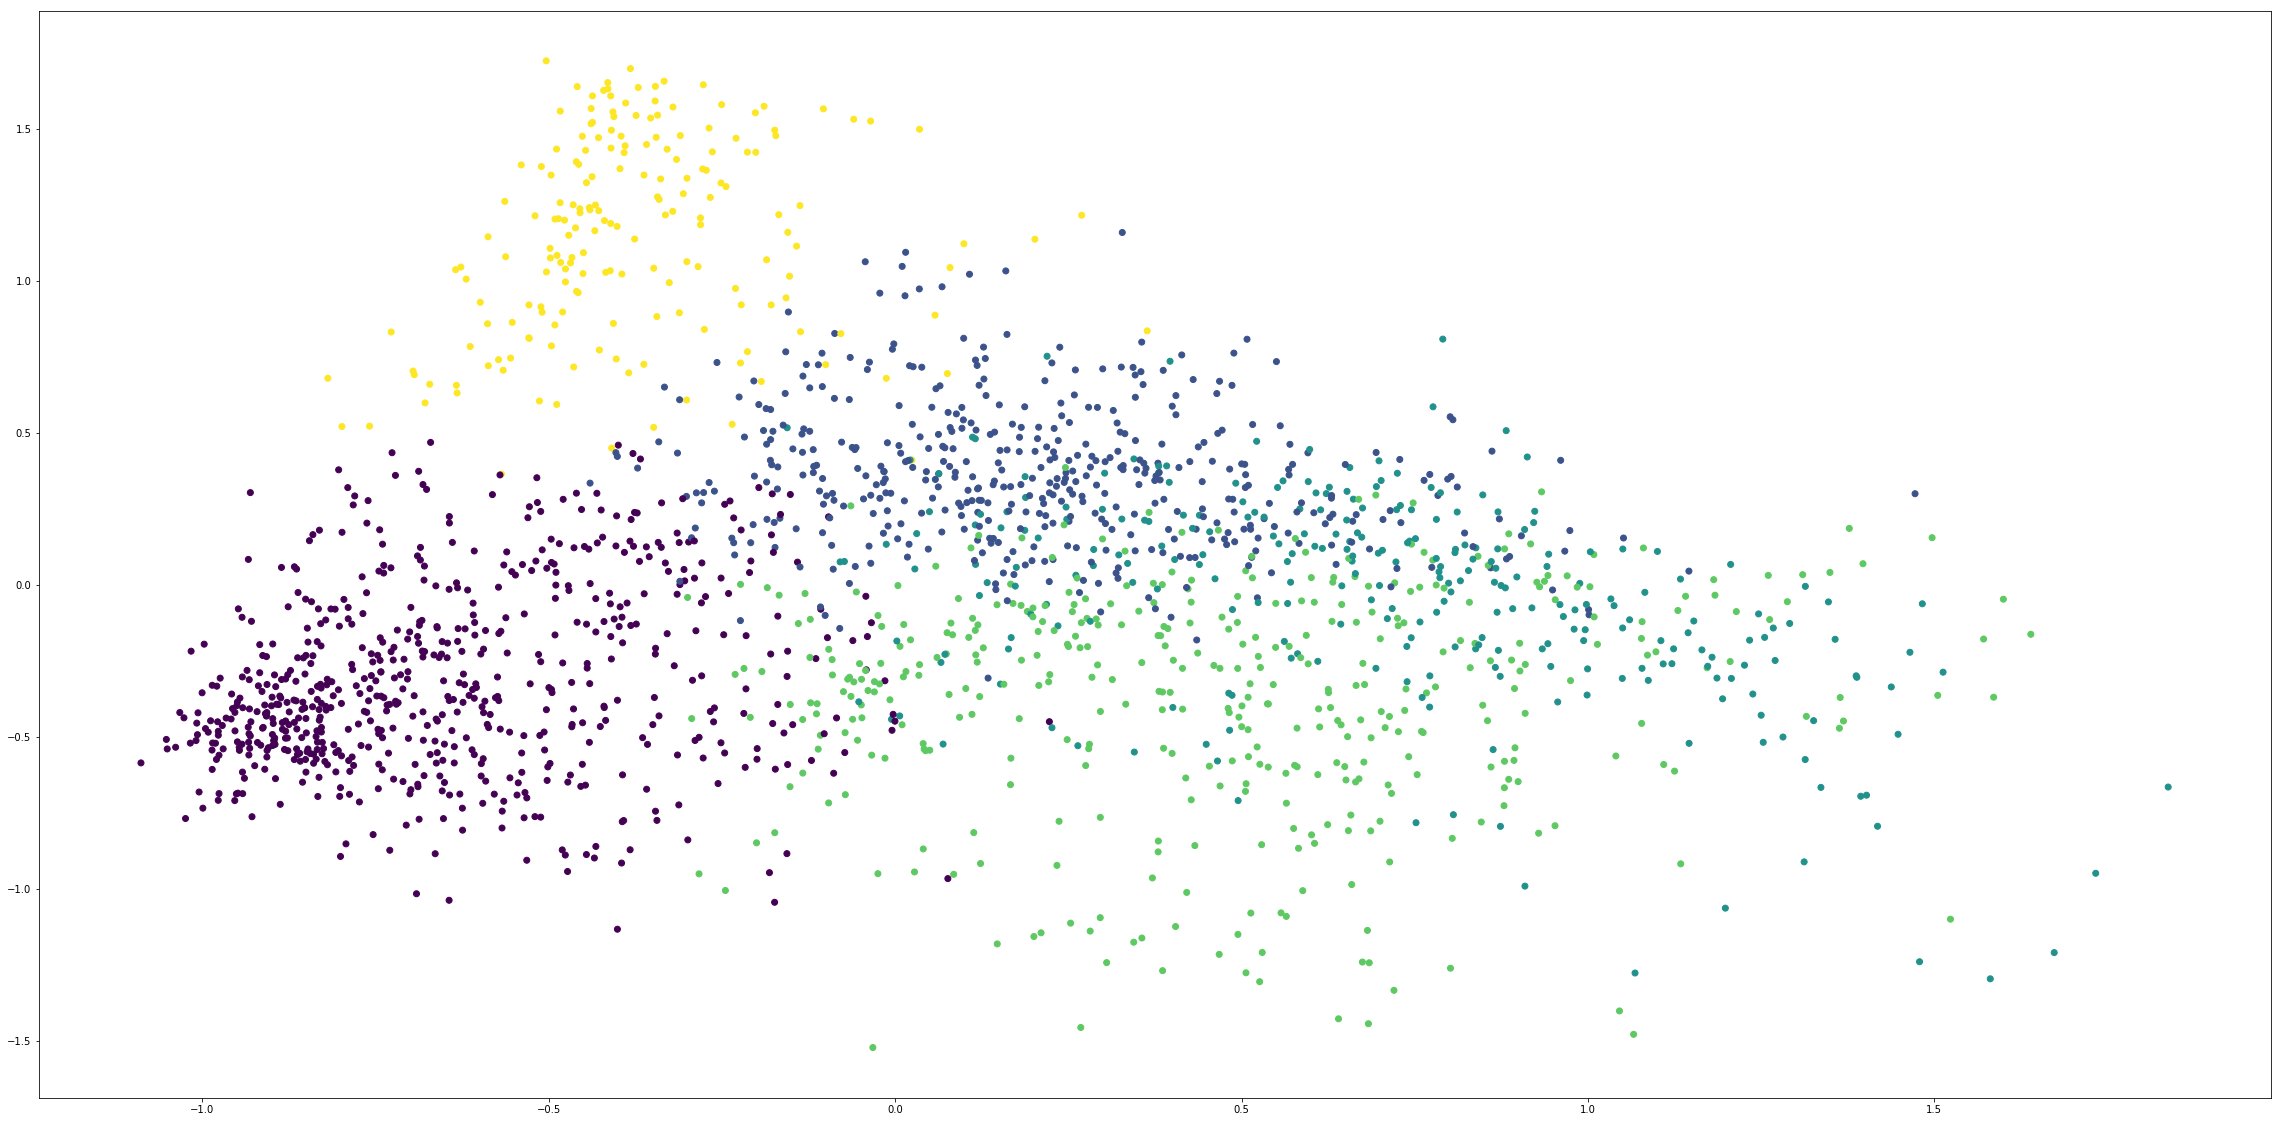

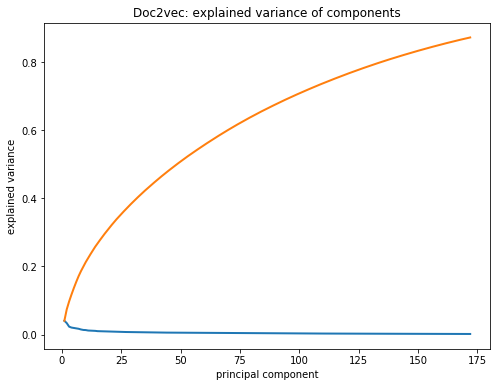

In [16]:
vectorized_topics = pd.read_csv('Archive_CSV/vectorized_topics.csv',index_col=0)
subjects = master_df.main_subject.value_counts()
adjust_vecs = vectorized_topics[(vectorized_topics.index.isin(list(subjects.index)))]

X = adjust_vecs.iloc[:,:300]
pca = PCA(n_components=172)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig, ax = plt.subplots()
fig.set_size_inches(40, 20)
ax.scatter(result[:, 0], result[:, 1], c=adjust_vecs.cluster)
words = list(adjust_vecs.index)
# for i, word in enumerate(words):
#     text = ax.annotate(word, xy=(result[i, 0], result[i, 1]))
#     text.set_fontsize(20)
x_values = range(1, pca.n_components_+1)
ratio = pca.explained_variance_ratio_
def plot_explained_variance(total_features,exp_variance_ratio):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(total_features, exp_variance_ratio, lw=2, label='explained variance')
    ax.plot(total_features, np.cumsum(exp_variance_ratio), lw=2, label='cumulative explained variance')
    ax.set_title('Doc2vec: explained variance of components')
    ax.set_xlabel('principal component')
    ax.set_ylabel('explained variance')
    plt.show()
plot_explained_variance(x_values,ratio)

In [17]:
df_0 = master_df[(master_df.main_cluster == 0)]
df_1 = master_df[(master_df.main_cluster == 1)]
df_2 = master_df[(master_df.main_cluster == 2)]
df_3 = master_df[(master_df.main_cluster == 3)]
df_4 = master_df[(master_df.main_cluster == 4)]

In [18]:
print('Cluster 0')
display(pd.DataFrame(df_0.main_subject.value_counts()[:5]))
print('Cluster 1')
display(pd.DataFrame(df_1.main_subject.value_counts()[:5]))
print('Cluster 2')
display(pd.DataFrame(df_2.main_subject.value_counts()[:5]))
print('Cluster 3')
display(pd.DataFrame(df_3.main_subject.value_counts()[:5]))

Cluster 0


main_subject
Williams            28
Woods               15
Manafort            13
Cosby               12
Ford                12

Cluster 1


main_subject
U.S.                 163
Healthline            50
House                 19
Nike                  15
VPN                   12

Cluster 2


main_subject
Canada            53
China             51
Iran              29
US                27
EU                16

Cluster 3


main_subject
Trump                   245
Senate                   90
CNBC                     34
Amazon                   31
Supreme_Court            31

In [19]:
def normalize_column(dataframe, column):
    normalized_column=(dataframe[column]-dataframe[column].mean())/dataframe[column].std()
    return normalized_column

In [20]:
reg_df = pd.read_csv('Archive_CSV/normalized_df.csv', index_col=0)

In [21]:
reg_df.head(1)

author source_name       neg       neu       pos  compound  \
0  Felix Salmon       Axios  2.930989 -3.163052  0.836945  -1.45424   

   subjectivity     main_subject sub_topic  main_cluster sub_cluster  \
0     -0.211723  Great_Recession     Great             3           1   

   total_factual  total_opinions  percent_opinion  total_sentences  \
0      -1.092576        0.005374         0.727499        -0.973483   

   total_words  article_length_minutes title_class  
0    -1.565727                -1.52499     factual

In [63]:
# reg_df = reg_df.drop(['main_subject','sub_topic'],axis=1)
reg_dummies = reg_df
reg_dummies = reg_dummies.drop(['author'],axis=1)
reg_dummies = reg_dummies.drop(['main_subject'],axis=1)
reg_dummies = reg_dummies.drop(['sub_topic'],axis=1)
reg_dummies = pd.get_dummies(reg_dummies)
reg_dummies = reg_dummies.drop(['total_opinions', 'total_factual','subjectivity'], axis=1)

In [23]:
# reg_dummies
reg_no_dummies = reg_dummies.iloc[:,:9]

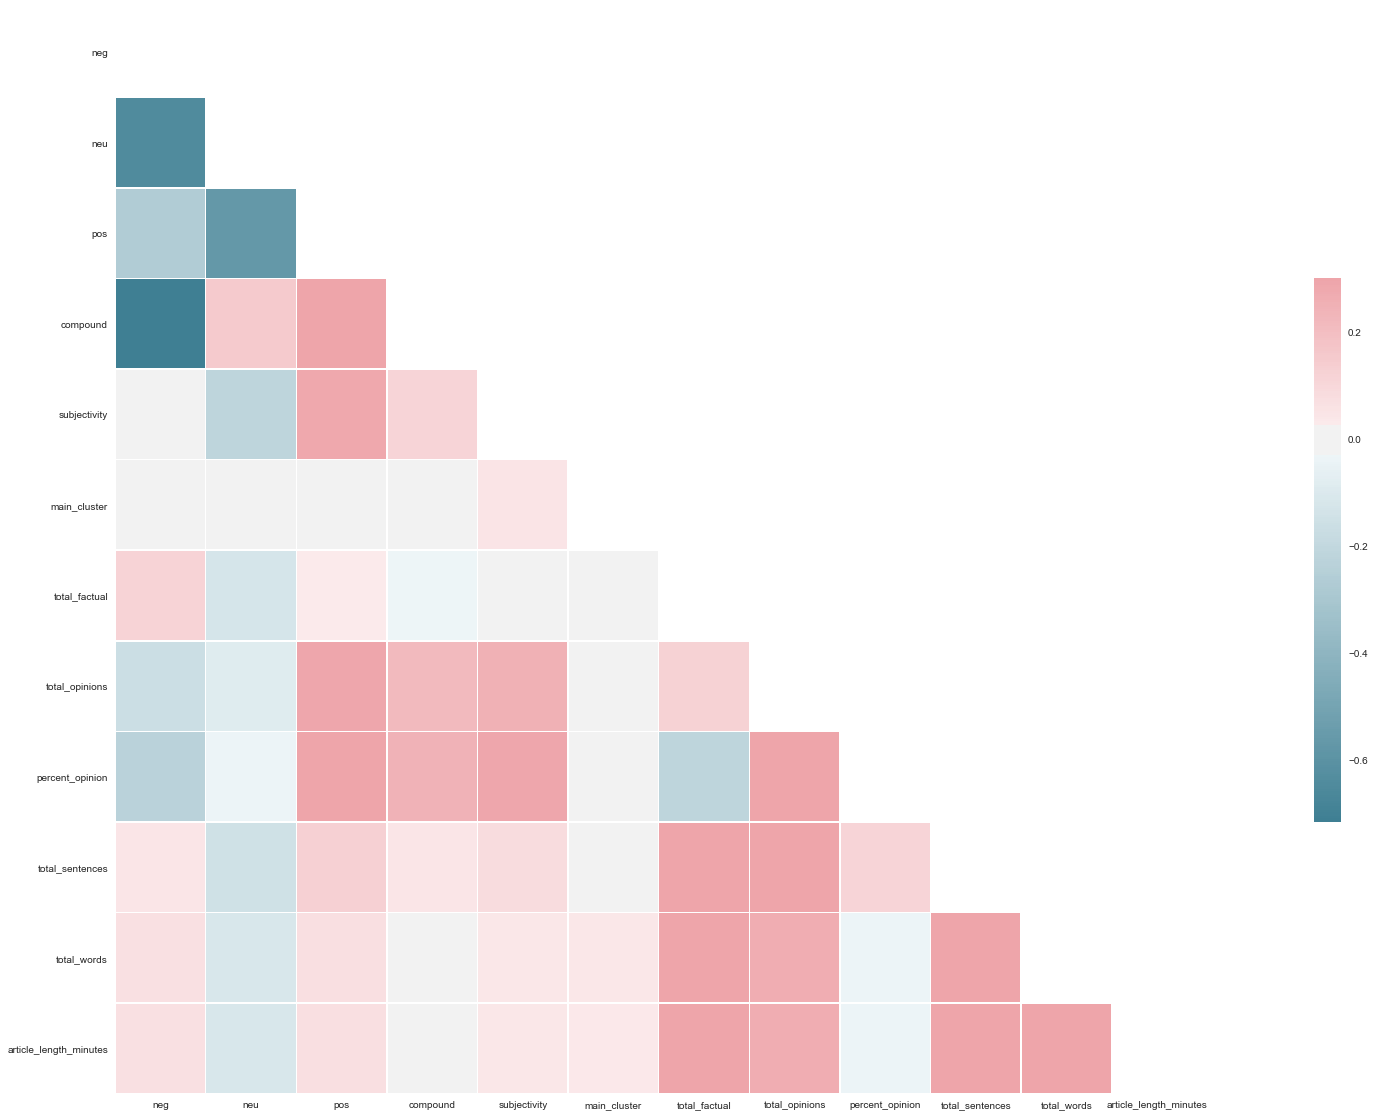

In [24]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

corr = reg_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Highly Correlated


percent_opinion
source_name_TechCrunch                   0.063584
source_name_Mashable                     0.079790
source_name_Vice News                    0.081932
source_name_MTV News                     0.083635
source_name_Entertainment Weekly         0.100441
source_name_Engadget                     0.108999
source_name_TechRadar                    0.115972
source_name_Wired                        0.116220
source_name_The Next Web                 0.157564
percent_opinion                          1.000000

Low Correlation


percent_opinion
source_name_Reuters                     -0.143546
source_name_Fox News                    -0.128037
source_name_Associated Press            -0.112201
source_name_Medical News Today          -0.091385
source_name_The Telegraph               -0.068811
source_name_Politico                    -0.065293
source_name_The Washington Times        -0.062818
source_name_The Washington Post         -0.049632
source_name_Time                        -0.047932
source_name_Independent                 -0.042090

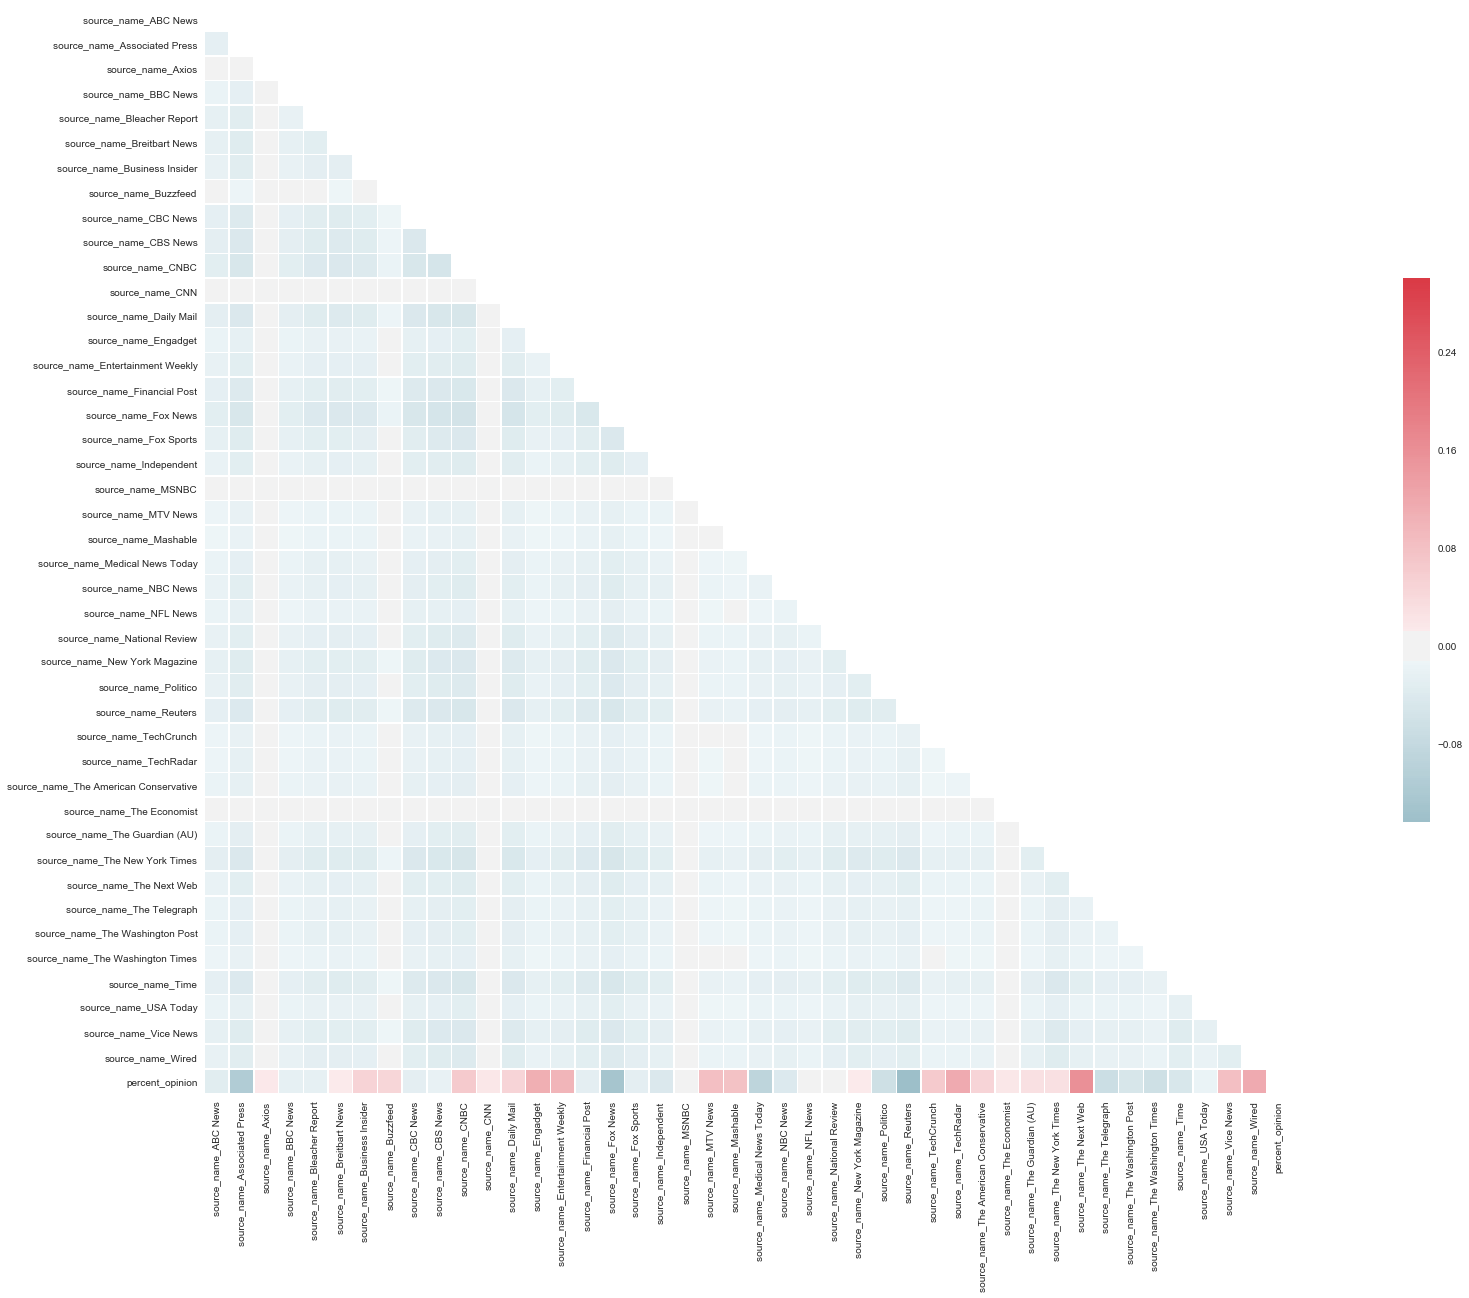

In [64]:
sns.set(style="white")
source_dummies = reg_dummies.ix[:,['source_name_ABC News',
       'source_name_Associated Press', 'source_name_Axios',
       'source_name_BBC News', 'source_name_Bleacher Report',
       'source_name_Breitbart News', 'source_name_Business Insider',
       'source_name_Buzzfeed', 'source_name_CBC News', 'source_name_CBS News',
       'source_name_CNBC', 'source_name_CNN', 'source_name_Daily Mail',
       'source_name_Engadget', 'source_name_Entertainment Weekly',
       'source_name_Financial Post', 'source_name_Fox News',
       'source_name_Fox Sports', 'source_name_Independent',
       'source_name_MSNBC', 'source_name_MTV News', 'source_name_Mashable',
       'source_name_Medical News Today', 'source_name_NBC News',
       'source_name_NFL News', 'source_name_National Review',
       'source_name_New York Magazine', 'source_name_Politico',
       'source_name_Reuters', 'source_name_TechCrunch',
       'source_name_TechRadar', 'source_name_The American Conservative',
       'source_name_The Economist', 'source_name_The Guardian (AU)',
       'source_name_The New York Times', 'source_name_The Next Web',
       'source_name_The Telegraph', 'source_name_The Washington Post',
       'source_name_The Washington Times', 'source_name_Time',
       'source_name_USA Today', 'source_name_Vice News', 'source_name_Wired','percent_opinion']]
corr = source_dummies.corr(method='kendall')
# corr = corr['percent_opinion']
for_display = pd.DataFrame(corr.percent_opinion.sort_values())
print('Highly Correlated')
display(pd.DataFrame(for_display['percent_opinion'][-10:]))
print('Low Correlation')
display(pd.DataFrame(for_display['percent_opinion'][:10]))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [60]:
def regression_evaluation(target, X_list):
    target = target
    X = X_list 
    X2 = sm.add_constant(X)
    # model = sm.ols(formula = 'over_under_line ~ np.power(total_points_against, 1)', data = reg_df).fit()

    est = sm.OLS(target, X2)
    est2 = est.fit()
    
    y_predicted = est2.fittedvalues
    y_actual = target
    rmse = math.sqrt(mean_squared_error(y_actual, y_predicted))
    residuals = y_actual-y_predicted
    
    plt.scatter(y_predicted,residuals)
    check = round(rmse_check(y_predicted, y_actual) - rmse)
    print(est2.summary())
    plt.scatter(y_predicted,residuals)
    df = pd.DataFrame(est2.params)
    df[0] = normalize_column(df,0)
    df[0] = round(df[0],2)
    display(df)
    
    print('RMSE=' + str(rmse) + ', check =' + str(check))

In [27]:
X = reg_no_dummies
X = reg_no_dummies.drop('percent_opinion', axis=1)
y = reg_df.percent_opinion
#Perform test train spli
X_train , X_test, y_train, y_test = train_test_split(X, y)

ridge_reg = Ridge(alpha=2.3)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = .1)
lasso_reg.fit(X_train, y_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

def rss(residual_col):
    return sum(residual_col.astype(float).map(lambda x: x**2))

print('Train Error  Ridge Model', rss(y_train - ridge_reg.predict(X_train)))
print('Test Error Ridge Model', rss(y_test - ridge_reg.predict(X_test)))
print('\n')

print('Train Error Lasso Model', rss(y_train - lasso_reg.predict(X_train)))
print('Test Error Lasso Model', rss(y_test - lasso_reg.predict(X_test)))
print('\n')

print('Train Error Unpenalized Linear Model', rss(y_train - lin_reg.predict(X_train)))
print('Test Error Unpenalized  Linear Model', rss(y_test - lin_reg.predict(X_test)))

Train Error  Ridge Model 2962.5711044047916
Test Error Ridge Model 818.6144991112653


Train Error Lasso Model 3235.408515886348
Test Error Lasso Model 879.411184949419


Train Error Unpenalized Linear Model 2961.005723942281
Test Error Unpenalized  Linear Model 820.6178310313675


In [36]:
def poly_regression(x, y, degree_range, xlim_min, xlim_max, ylim_min, ylim_max,xfit1, xfit2, alpha = .75,s = 5,width = 2.5):
    plt.figure(figsize = (10,10))
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min,xlim_max)
    plt.scatter(x, y, s = s, alpha = alpha, color = 'green')
    for degree in degree_range:
        poly_model = make_pipeline(PolynomialFeatures(degree),
                               LinearRegression())
        poly_model.fit(x[:, np.newaxis], y)
        xfit = np.linspace(xfit1,xfit2, 10000)
        yfit = poly_model.predict(xfit[:, np.newaxis])
        plt.plot(xfit, yfit, label = 'degree={}'.format(degree),linewidth=width)
    plt.legend(loc = 'best')

In [37]:
x = reg_dummies.pos
y = reg_df.percent_opinion

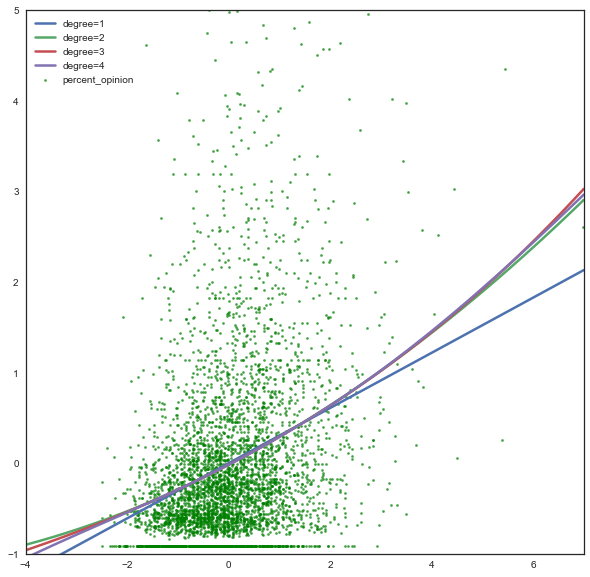

In [38]:
poly_regression(x,y,[1,2,3,4],-4,7,-1,5,-4,8)

In [39]:
def rmse_check(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val                                 

In [40]:

def log_log_regression_evaluation(target, X_list):
    split = train_test_split((np.log(np.abs(X_list)+1)), np.log(np.abs(target)+1))
    X_train, X_test, y_train, y_test = split[0], split[1], split[2],split[3]
    X = X_train
    target = y_train
    
    X2 = sm.add_constant(X)
    est = sm.OLS(target, X2)
    est2 = est.fit()
    
    y_predicted = est2.fittedvalues
    y_actual = target
    
    log_rmse = math.sqrt(mean_squared_log_error(y_actual, y_predicted))
    residuals = y_actual-y_predicted

    #plt.scatter(y_predicted,residuals)
    print(est2.summary())
    sns.distplot(residuals)
    print('Log RMSE=' + str(log_rmse))

In [26]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
X = reg_dummies
y = reg_df.percent_opinion
#Perform test train spli
X_train , X_test, y_train, y_test = train_test_split(X, y)

ridge_reg = Ridge(alpha=2.3)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = .1)
lasso_reg.fit(X_train, y_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

def rss(residual_col):
    return sum(residual_col.astype(float).map(lambda x: x**2))

print('Train Error  Ridge Model', rss(y_train - ridge_reg.predict(X_train)))
print('Test Error Ridge Model', rss(y_test - ridge_reg.predict(X_test)))
print('\n')

print('Train Error Lasso Model', rss(y_train - lasso_reg.predict(X_train)))
print('Test Error Lasso Model', rss(y_test - lasso_reg.predict(X_test)))
print('\n')

print('Train Error Unpenalized Linear Model', rss(y_train - lin_reg.predict(X_train)))
print('Test Error Unpenalized  Linear Model', rss(y_test - lin_reg.predict(X_test)))

Train Error  Ridge Model 0.003116968550773599
Test Error Ridge Model 0.0012444912134530303


Train Error Lasso Model 35.01622173536942
Test Error Lasso Model 12.329543189196807


Train Error Unpenalized Linear Model 2.1673121757406578e-26
Test Error Unpenalized  Linear Model 4.805646453578574e-09


                            OLS Regression Results                            
Dep. Variable:        percent_opinion   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.659
Date:                Thu, 04 Oct 2018   Prob (F-statistic):            0.00328
Time:                        14:06:19   Log-Likelihood:                -921.93
No. Observations:                3453   AIC:                             1848.
Df Residuals:                    3451   BIC:                             1860.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4470      0.010     45.486   

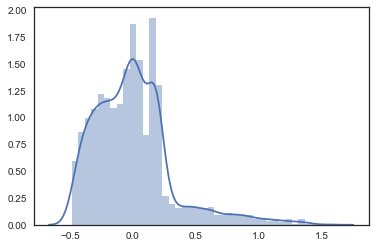

In [41]:
log_log_regression_evaluation(reg_df.percent_opinion,reg_dummies.main_cluster)

                            OLS Regression Results                            
Dep. Variable:        percent_opinion   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     51.93
Date:                Thu, 04 Oct 2018   Prob (F-statistic):               0.00
Time:                        14:19:21   Log-Likelihood:                -5634.1
No. Observations:                4605   AIC:                         1.135e+04
Df Residuals:                    4562   BIC:                         1.163e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

0
const                                 -6.48
source_name_ABC News                   0.15
source_name_Associated Press           0.15
source_name_Axios                      0.15
source_name_BBC News                   0.15
source_name_Bleacher Report            0.15
source_name_Breitbart News             0.15
source_name_Business Insider           0.15
source_name_Buzzfeed                   0.15
source_name_CBC News                   0.15
source_name_CBS News                   0.15
source_name_CNBC                       0.15
source_name_CNN                        0.15
source_name_Daily Mail                 0.15
source_name_Engadget                   0.15
source_name_Entertainment Weekly       0.15
source_name_Financial Post             0.15
source_name_Fox News                   0.15
source_name_Fox Sports                 0.15
source_name_Independent                0.15
source_name_MSNBC                      0.15
source_name_MTV News                   0.15
source_name_Mashable                   0.15
source_name_Medical News Today         0.15
source_name_NBC News                   0.15
source_name_NFL News                   0.15
source_name_National Review            0.15
source_name_New York Magazine          0.15
source_name_Politico                   0.15
source_name_Reuters                    0.15
source_name_TechCrunch                 0.15
source_name_TechRadar                  0.15
source_name_The American Conservative  0.15
source_name_The Economist              0.15
source_name_The Guardian (AU)          0.15
source_name_The New York Times         0.15
source_name_The Next Web               0.15
source_name_The Telegraph              0.15
source_name_The Washington Post        0.15
source_name_The Washington Times       0.15
source_name_Time                       0.15
source_name_USA Today                  0.15
source_name_Vice News                  0.15
source_name_Wired                      0.15

RMSE=0.8224448339301971, check =0.0


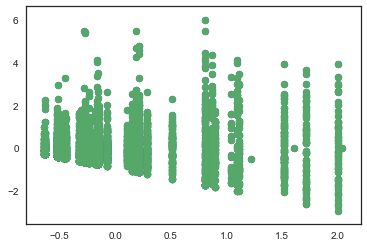

In [61]:

regression_evaluation(reg_df.percent_opinion,reg_dummies.ix[:,['source_name_ABC News',
       'source_name_Associated Press', 'source_name_Axios',
       'source_name_BBC News', 'source_name_Bleacher Report',
       'source_name_Breitbart News', 'source_name_Business Insider',
       'source_name_Buzzfeed', 'source_name_CBC News', 'source_name_CBS News',
       'source_name_CNBC', 'source_name_CNN', 'source_name_Daily Mail',
       'source_name_Engadget', 'source_name_Entertainment Weekly',
       'source_name_Financial Post', 'source_name_Fox News',
       'source_name_Fox Sports', 'source_name_Independent',
       'source_name_MSNBC', 'source_name_MTV News', 'source_name_Mashable',
       'source_name_Medical News Today', 'source_name_NBC News',
       'source_name_NFL News', 'source_name_National Review',
       'source_name_New York Magazine', 'source_name_Politico',
       'source_name_Reuters', 'source_name_TechCrunch',
       'source_name_TechRadar', 'source_name_The American Conservative',
       'source_name_The Economist', 'source_name_The Guardian (AU)',
       'source_name_The New York Times', 'source_name_The Next Web',
       'source_name_The Telegraph', 'source_name_The Washington Post',
       'source_name_The Washington Times', 'source_name_Time',
       'source_name_USA Today', 'source_name_Vice News', 'source_name_Wired']])